### Build a Simple Workflow or Graph Using LangGraph

#### State
First, define the State of the graph.

The State schema serves as the input schema for all Nodes and Edges in the graph.

Let's use the TypedDict class from python's typing module as our schema, which provides type hints for the keys.

In [110]:
from typing_extensions import TypedDict
class State(TypedDict):
    graph_info:str

#### Nodes
Nodes are just python functions.

The first positional argument is the state, as defined above.

Because the state is a TypedDict with schema as defined above, each node can access the key, graph_state, with state['graph_state'].

Each node returns a new value of the state key graph_state.

By default, the new value returned by each node will override the prior state value.

In [111]:
def start_play(state:State):
    print("Start_Play node has been called")
    return {"graph_info":state['graph_info'] + " I am planning to play"}

def basketball(state:State):
    print("My Basketball node has been called")
    return {"graph_info":state['graph_info'] + " Basketball"}

def badminton(state:State):
    print("My badminton node has been called")
    return {"graph_info":state['graph_info'] + " Badminton"}

In [112]:
import random
from typing import Literal

def random_play(state:State)-> Literal['basketball','badminton']:
    graph_info=state['graph_info']

    if random.random()>0.5:
        return "basketball"
    else:
        return "badminton"

#### Graph Construction
Now, we build the graph from our components defined above.

The StateGraph class is the graph class that we can use.

First, we initialize a StateGraph with the State class we defined above.

Then, we add our nodes and edges.

We use the START Node, a special node that sends user input to the graph, to indicate where to start our graph.

The END Node is a special node that represents a terminal node.

Finally, we compile our graph to perform a few basic checks on the graph structure.

We can visualize the graph as a Mermaid diagram.

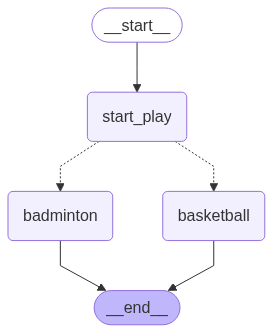

In [113]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END

## Build Graph
graph=StateGraph(State)

## Adding the nodes
graph.add_node("start_play",start_play)
graph.add_node("basketball",basketball)
graph.add_node("badminton",badminton)

## Schedule the flow of the graph

graph.add_edge(START,"start_play")
graph.add_conditional_edges("start_play",random_play)
graph.add_edge("basketball",END)
graph.add_edge("badminton",END)

## Compile the graph
graph_builder=graph.compile()

## View
display(Image(graph_builder.get_graph().draw_mermaid_png()))

### GRAPH Invocation

In [114]:
graph_builder.invoke({"graph_info":"Hey My name is Ibrahim"})

Start_Play node has been called
My Basketball node has been called


{'graph_info': 'Hey My name is Ibrahim I am planning to play Basketball'}